In [1]:
import pandas, numpy, scipy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({
    'font.size':20,
    'font.family':'DejaVu Sans', 
    'xtick.labelsize':30, 
    'ytick.labelsize':30, 
    'axes.labelsize':40, 
    'figure.figsize':(12, 8)
    })

### user-defined variables

In [3]:
input_data_file = '/Users/lidiayung/project/fastcms/metabolomics data and sample list/HPMVEC_EC005_Quantitative_Extracellular_Final.xlsx'

### read data

In [4]:
df = pandas.read_excel(input_data_file, sheet_name='Results_finalized_mgL', index_col=1)
#df.drop(columns=['Calculated Sample Concentrations [mg/L]','Experiment/Batch','Timepoint','Treatment','Rep'],inplace=True)

In [6]:
#df = df[df.index.notna()]
#Filtering, using Timepoint of time0 and time24; remove Treatment of 50.0

df = df[df['Timepoint']!= 4] 
df=df[~(df['Treatment'] == 50) ]

print(df.shape)
df.head(10)

(37, 62)


,Calculated Sample Concentrations [mg/L],Experiment/Batch,Timepoint,Treatment,Rep,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,...,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Pyruvate,Orotate,Lactate,Thymidine
Sample ID,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,146,57.9,204,202.1,174.1,...,132.000000,284.000000,176.120000,105.000000,167.1,219.000000,88,156.000000,89.020000,242.220000
005-1,005-1,1.0,0.0,0.0,1.0,424.545424,111.349921,7.420785,0.86195,135.756688,...,2.534097,0.000000,10.564323,5.253683,-,209.290931,388.811643,2.522259,1606.423813,140.647318
005-2,005-2,1.0,0.0,0.5,1.0,408.445251,0,7.618425,0.959674,208.610529,...,3.027645,0.903921,9.035232,7.974287,-,340.037594,434.87307,5.070258,2690.445144,555.257314
005-3,005-3,1.0,0.0,5.0,1.0,342.326427,0,8.143814,0.12731,166.63517,...,2.844587,0.662721,6.319757,7.059527,-,220.122990,250.828243,9.250718,1638.568018,435.761781
005-17,005-17,1.0,24.0,0.0,1.0,304.016115,34.044576,6.430333,0.236083,90.851373,...,2.690349,0.270971,0.441570,4.462831,-,347.739667,43.577433,3.980250,4634.097374,39.949632
005-18,005-18,1.0,24.0,0.0,2.0,288.50285,0,5.655473,0.253908,79.713467,...,2.865094,0.238062,0.997242,5.775041,-,188.608283,34.371694,0.000000,2070.942134,60.370232
005-19,005-19,1.0,24.0,0.0,3.0,404.582769,0,4.965149,1.257789,87.371996,...,2.427591,0.268156,0.770163,4.796246,-,115.979035,33.048032,0.811183,1892.353940,31.981435
005-20,005-20,1.0,24.0,0.5,1.0,490.710138,0,6.653441,1.410053,145.110431,...,8.166121,1.192968,0.958220,8.080335,-,185.781010,32.263697,8.355143,3346.998700,1218.601666
005-21,005-21,1.0,24.0,0.5,2.0,418.262306,0,6.830862,0.622078,205.652439,...,3.513152,3.555281,0.952579,8.001825,-,378.992532,66.499581,6.395660,8148.220678,8150.154504


## Extract molecolar weight mol/g

For Batch 1 Uric acid is excluded in the experiment

For Batch 2 Pyruvate and Orotate aren't included

For Batch 3 The following compounds are excluded: “Glutamine" ,
"N,N_Dimethylglycine" ,"Tryptophan" ,"ADMA" ,"Arginine" ,"Carnitine" ,"Citrulline" ,
"Cysteine" ,"Cystine" ,"Glucose" ,"Guanine" ,"Hypoxanthine" ,"Nicotinamide" ,"Phosphocholine" ,
"Proline" ,"Serotonin" ,"SAMe" ,"Thiamine" ,"(Iso)leucine" ,"Creatine" ,"Hydroxyproline" ,"Xanthine" ,"Thymine" ,
"Valine" ,"Methionine" ,"4-Hydroxyproline" ,"Inosine" ,"Threonine" ,"C2_AcetylCarnitine”,"Pyruvate","Orotate"


In [7]:
reference_mmol_per_g=df.iloc[0].dropna()
print(len(reference_mmol_per_g))
batch1_mmol_per_g=reference_mmol_per_g.drop('Uric acid')
batch1_mmol_per_g=batch1_mmol_per_g.astype('float')
print(len(batch1_mmol_per_g))

57
56


In [8]:
batch2_mmol_per_g=reference_mmol_per_g.drop(['Pyruvate','Orotate'])
batch2_mmol_per_g=batch2_mmol_per_g.astype('float')
len(batch2_mmol_per_g)

55

In [9]:
batch3_mmol_per_g=reference_mmol_per_g.drop(["Glutamine" ,"N,N_Dimethylglycine" ,"Tryptophan" ,"ADMA" ,"Arginine" ,"Carnitine" ,"Citrulline" ,"Cysteine" ,
                                            "Cystine" ,"Glucose" ,"Guanine" ,"Hypoxanthine" ,"Nicotinamide" ,"Phosphocholine" ,
                                            "Proline" ,"Serotonin" ,"SAMe" ,"Thiamine" ,"(Iso)leucine" ,"Creatine" ,"Hydroxyproline" ,
                                            "Xanthine" ,"Thymine" ,"Valine" ,"Methionine" ,"4-Hydroxyproline" ,"Inosine" ,"Threonine" ,
                                            "C2_AcetylCarnitine","Pyruvate","Orotate"])
batch3_mmol_per_g=batch3_mmol_per_g.astype('float')
len(batch3_mmol_per_g)

26

In [10]:
#to double check
#reference_mmol_per_g['Orotate']
#batch3_mmol_per_g['Orotate']

### Assign data to their corresponding batches

In [11]:
grouped = df.groupby('Experiment/Batch')

# Access each group as a separate DataFrame
df_batch1 = grouped.get_group(1)
df_batch2 = grouped.get_group(2)
df_batch3 = grouped.get_group(3)

### Cell counts

In [12]:
#Excluding cell counts at 50µM
#batch 1
batch1_t0_counts_avg=3.7*10**5
batch1_t24_counts_avg=(5.8*10**5+3.9*10**5+4.1*10**5)/3
#batch 2
batch2_t0_counts_avg=2.4*10**5
batch2_t24_counts_avg=(2.3*10**5+2.8*10**5+2.5*10**5)/3
#batch 3
#batch3_t0_counts_avg(missing)
batch3_t4_counts_avg=(6.16*10**4+3.16*10**4+4.28*10**4)/3
batch3_t24_counts_avg=(5.1*10**4+4.8*10**4+3.3*10**4)/3

In [13]:
print(batch3_t4_counts_avg)
batch3_t24_counts_avg

45333.333333333336


44000.0

## Rates calculation

### batch 3 rates

In [14]:
df_batch3=df_batch3.drop(columns=["Experiment/Batch","Rep","Calculated Sample Concentrations [mg/L]","Glutamine" ,"N,N_Dimethylglycine" ,"Tryptophan" ,"ADMA" ,"Arginine" ,"Carnitine" ,"Citrulline" ,"Cysteine" ,
                                            "Cystine" ,"Glucose" ,"Guanine" ,"Hypoxanthine" ,"Nicotinamide" ,"Phosphocholine" ,
                                            "Proline" ,"Serotonin" ,"SAMe" ,"Thiamine" ,"(Iso)leucine" ,"Creatine" ,"Hydroxyproline" ,
                                            "Xanthine" ,"Thymine" ,"Valine" ,"Methionine" ,"4-Hydroxyproline" ,"Inosine" ,"Threonine" ,
                                            "C2_AcetylCarnitine","Pyruvate","Orotate"])
df_batch3

,Timepoint,Treatment,Oxoproline,Aspartate,Tyrosine,Glutamine_NEG,Gluconate,Xanthine_NEG,Adenine,Uridine,...,Hydroxyglutarate,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Lactate,Thymidine
Sample ID,,,,,,,,,,,,,,,,,,,,,
005-122,0.0,0.0,962.739338,4.088386,38.871056,420.156363,0.468261,3.650696,0.764081,1.181349,...,0.372246,0.101354,3.211272,1.087181,1.289363,0.098982,0.679066,982.673012,9879.220202,767.803613
005-123,0.0,0.5,2532.061600,3.487881,29.445430,496.895819,0.486575,10.585261,1.677480,4.563778,...,0.506912,0.187182,4.540958,0.451102,3.698371,0.349743,0.731139,832.398874,7959.007623,185.002850
005-124,0.0,5.0,1729.985685,4.977051,36.042134,358.328712,0.328993,5.360943,1.049886,3.111157,...,0.568605,0.094193,2.916527,1.352541,0.120260,0.000000,0.513365,1151.300507,10328.072756,2464.965029
005-138,24.0,0.0,837.755951,3.505332,47.208415,440.546737,0.399514,3.012833,0.000000,0.456480,...,0.244110,0.064905,4.179458,1.075361,1.311312,0.000000,0.658334,1435.510173,29917.876587,374.729991
005-139,24.0,0.0,1937.566961,0.730547,32.969282,279.527909,0.515749,7.524391,0.000000,0.856269,...,0.164242,0.084381,0.739719,2.526515,1.997704,1.568415,1.017742,755.100565,23046.875299,577.382599
005-140,24.0,0.0,2136.550117,0.270205,26.025215,408.109782,0.351657,6.067653,0.000000,1.269859,...,0.185188,0.110614,3.260176,0.517672,2.943205,0.430127,0.779991,1110.853738,18891.796435,208.541475
005-141,24.0,0.5,1428.225410,9.592830,95.710743,404.275409,0.476449,6.948943,0.000000,0.463969,...,0.181282,0.053644,0.933683,1.230731,10.571604,1.647038,0.933258,2226.801199,81765.910195,205.263108
005-142,24.0,0.5,1090.113465,3.658166,35.621225,0.000000,0.428954,4.207995,0.000000,0.667508,...,0.328885,0.047266,0.000000,20.567145,0.000000,0.000000,0.778425,746.434604,26290.138015,1542.651251
005-143,24.0,0.5,906.255336,8.691436,23.581888,1023.398435,1.235586,2.888445,0.000000,0.387037,...,0.166214,0.071755,3.276004,0.964535,0.000000,9.056609,3.088793,492.175563,8259.943566,143.900792


In [15]:
df_batch3 = df_batch3.apply(pandas.to_numeric, errors='coerce')
batch3_mean_by_treatment = df_batch3.groupby(['Timepoint','Treatment']).mean()
batch3_mean_by_treatment

Oxoproline  Aspartate   Tyrosine  Glutamine_NEG  \
Timepoint Treatment                                                     
0.0       0.0         962.739338   4.088386  38.871056     420.156363   
          0.5        2532.061600   3.487881  29.445430     496.895819   
          5.0        1729.985685   4.977051  36.042134     358.328712   
24.0      0.0        1637.291010   1.502028  35.400971     376.061476   
          0.5        1141.531403   7.314144  51.637952     475.891281   
          5.0         636.060236   0.357479  19.838346     371.682859   

                     Gluconate  Xanthine_NEG   Adenine   Uridine  \
Timepoint Treatment                                                
0.0       0.0         0.468261      3.650696  0.764081  1.181349   
          0.5         0.486575     10.585261  1.677480  4.563778   
          5.0         0.328993      5.360943  1.049886  3.111157   
24.0      0.0         0.422307      5.534959  0.000000  0.860869   
          0.5         0.713663      4.681794  0.000000  0.506171   
          5.0         0.403368      2.844816  0.000000  0.376039   

                     Glyceric_Acid    Citrate  ...  Hydroxyglutarate  \
Timepoint Treatment                            ...                     
0.0       0.0            14.746177  15.186268  ...          0.372246   
          0.5            11.915626  15.322946  ...          0.506912   
          5.0            17.736678  15.545493  ...          0.568605   
24.0      0.0            10.687120  15.383879  ...          0.197847   
          0.5            28.629716  17.945741  ...          0.225460   
          5.0            11.852105  15.531252  ...          0.237080   

                      Taurine  Asparagine  Xanthosine  Ascorbic Acid  \
Timepoint Treatment                                                    
0.0       0.0        0.101354    3.211272    1.087181       1.289363   
          0.5        0.187182    4.540958    0.451102       3.698371   
          5.0        0.094193    2.916527    1.352541       0.120260   
24.0      0.0        0.086634    2.726451    1.373183       2.084074   
          0.5        0.057555    1.403229    7.587470       3.523868   
          5.0        0.071301    2.964061    0.523915       1.784189   

                       Serine  Uric acid  Panthotenic Acid       Lactate  \
Timepoint Treatment                                                        
0.0       0.0        0.098982   0.679066        982.673012   9879.220202   
          0.5        0.349743   0.731139        832.398874   7959.007623   
          5.0        0.000000   0.513365       1151.300507  10328.072756   
24.0      0.0        0.666181   0.818689       1100.488159  23952.182774   
          0.5        3.567882   1.600159       1155.137122  38771.997259   
          5.0        0.634944   0.876278        528.387605  14555.408992   

                       Thymidine  
Timepoint Treatment               
0.0       0.0         767.803613  
          0.5         185.002850  
          5.0        2464.965029  
24.0      0.0         386.884688  
          0.5         630.605050  
          5.0         106.095252  

[6 rows x 26 columns]

In [16]:
batch_3_mean_by_treatment_mmol_L=batch3_mean_by_treatment/batch3_mmol_per_g
batch_3_mean_by_treatment_mmol_L

Oxoproline  Aspartate  Tyrosine  Glutamine_NEG  \
Timepoint Treatment                                                   
0.0       0.0          7.460782   0.017622  0.214757       2.854323   
          0.5         19.622300   0.015034  0.162682       3.375651   
          5.0         13.406585   0.021453  0.199128       2.434298   
24.0      0.0         12.688244   0.006474  0.195585       2.554765   
          0.5          8.846338   0.031526  0.285293       3.232957   
          5.0          4.929171   0.001541  0.109604       2.525019   

                     Gluconate  Xanthine_NEG   Adenine   Uridine  \
Timepoint Treatment                                                
0.0       0.0         0.002389      0.010342  0.005656  0.004842   
          0.5         0.002483      0.029987  0.012417  0.018704   
          5.0         0.001679      0.015187  0.007771  0.012751   
24.0      0.0         0.002155      0.015680  0.000000  0.003528   
          0.5         0.003641      0.013263  0.000000  0.002074   
          5.0         0.002058      0.008059  0.000000  0.001541   

                     Glyceric_Acid   Citrate  ...  Hydroxyglutarate   Taurine  \
Timepoint Treatment                           ...                               
0.0       0.0             0.078022  0.055607  ...          0.002513  0.000817   
          0.5             0.063046  0.056107  ...          0.003423  0.001510   
          5.0             0.093845  0.056922  ...          0.003839  0.000760   
24.0      0.0             0.056546  0.056331  ...          0.001336  0.000699   
          0.5             0.151480  0.065711  ...          0.001522  0.000464   
          5.0             0.062710  0.056870  ...          0.001601  0.000575   

                     Asparagine  Xanthosine  Ascorbic Acid    Serine  \
Timepoint Treatment                                                    
0.0       0.0          0.024328    0.003828       0.007321  0.000943   
          0.5          0.034401    0.001588       0.020999  0.003331   
          5.0          0.022095    0.004762       0.000683  0.000000   
24.0      0.0          0.020655    0.004835       0.011833  0.006345   
          0.5          0.010631    0.026716       0.020008  0.033980   
          5.0          0.022455    0.001845       0.010131  0.006047   

                     Uric acid  Panthotenic Acid     Lactate  Thymidine  
Timepoint Treatment                                                      
0.0       0.0         0.004064          4.487091  110.977535   3.169861  
          0.5         0.004375          3.800908   89.406960   0.763780  
          5.0         0.003072          5.257080  116.019689  10.176554  
24.0      0.0         0.004899          5.025060  269.065185   1.597245  
          0.5         0.009576          5.274599  435.542544   2.603439  
          5.0         0.005244          2.412729  163.507178   0.438012  

[6 rows x 26 columns]

In [17]:
batch_3_mean_by_treatment_mmol_L_t0 = batch_3_mean_by_treatment_mmol_L.loc[0.0]
batch_3_mean_by_treatment_mmol_L_t24=batch_3_mean_by_treatment_mmol_L.loc[24.0]

In [18]:
#Rates calculation for batch 3 timepoint(4 and 24,0missing)  mg/L>> mmol gDW-1 h-1
#First convert mg/L to mmol/L, dividing by mol/g(converted)

#Then times the factors seperately T4 and T24, (gDW-1 h-1) which are, 1/ (batch3_t4_counts_avg*0.9e-9*24*0.5)
#and 1/ (batch3_t24_counts_avg*0.9e-9*24*0.5)

#DW4= batch3_t4_counts_avg*0.9e-9
#DW24=batch3_t24_counts_avg*0.9e-9


#individual EC cell dry weight 0.9e-9

#Divide by 24h
#Divide by 0.5L, the total volume of the liquid in which the cells were cultivated 

In [19]:
batch_3_rate_t4=batch_3_mean_by_treatment_mmol_L_t0* (1/ (batch3_t4_counts_avg*0.9e-9*24*0.5))

In [20]:
batch_3_rate_t4

,Oxoproline,Aspartate,Tyrosine,Glutamine_NEG,Gluconate,Xanthine_NEG,Adenine,Uridine,Glyceric_Acid,Citrate,...,Hydroxyglutarate,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,15238.525774,35.993365,438.638107,5829.908324,4.879674,21.123193,11.551614,9.888881,159.358860,113.576365,...,5.133383,1.669472,49.689175,7.818834,14.952884,1.925414,8.300310,9164.810826,226669.802706,6474.388297
0.5,40078.227248,30.706634,332.275193,6894.711899,5.070523,61.247089,25.360661,38.202630,128.769685,114.598560,...,6.990474,3.083196,70.263878,3.244256,42.890431,6.803281,8.936797,7763.292685,182612.255902,1560.008661
5.0,27382.730109,43.817006,406.715305,4972.014529,3.428379,31.018806,15.872495,26.042985,191.676587,116.262962,...,7.841242,1.551519,45.128475,9.727266,1.394670,0.000000,6.274927,10737.499882,236968.319993,20785.446266


In [21]:
batch_3_rate_t24=batch_3_mean_by_treatment_mmol_L_t24* (1/ (batch3_t24_counts_avg*0.9e-9*24*0.5))

In [22]:
batch_3_rate=batch_3_rate_t24-batch_3_rate_t4

In [23]:
batch_3_rate

,Oxoproline,Aspartate,Tyrosine,Glutamine_NEG,Gluconate,Xanthine_NEG,Adenine,Uridine,Glyceric_Acid,Citrate,...,Hydroxyglutarate,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,11462.324460,-22.369084,-27.052514,-453.718377,-0.345529,11.872957,-11.551614,-2.464318,-40.365579,4.964398,...,-2.322338,-0.199230,-6.223409,2.356146,9.948759,11.425975,2.009868,1409.810565,339544.812317,-3113.182450
0.5,-21462.196952,35.636972,268.087924,-91.351050,2.591802,-33.337002,-25.360661,-33.837158,190.001319,23.682682,...,-3.787092,-2.106444,-47.893251,52.977219,-0.785349,64.703098,11.214831,3336.452119,733933.501488,3918.609247
5.0,-17009.895340,-40.574458,-176.066903,341.578535,0.902432,-14.059697,-15.872495,-22.799842,-59.712042,3.413388,...,-4.472754,-0.341484,2.125329,-5.845169,19.923790,12.725346,4.760496,-5660.208654,107112.441938,-19863.703971


### batch2 rates

In [24]:
df_batch2.drop(columns = ['Rep','Pyruvate','Orotate','Experiment/Batch','Calculated Sample Concentrations [mg/L]'],inplace=True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_59725/2919180174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch2.drop(columns = ['Rep','Pyruvate','Orotate','Experiment/Batch','Calculated Sample Concentrations [mg/L]'],inplace=True)


In [25]:
df_batch2 = df_batch2.apply(pandas.to_numeric, errors='coerce')

In [26]:
batch2_mean_by_treatment = df_batch2.groupby(['Timepoint','Treatment']).mean()

In [27]:
batch2_mean_by_treatment

Glutamine  N,N_Dimethylglycine  Tryptophan      ADMA  \
Timepoint Treatment                                                          
0.0       0.0        387.375334             0.000000    6.713926  0.494434   
          0.5        379.748145             5.195309    5.909044  0.493139   
          5.0        267.244433             0.000000    7.127102  0.504185   
24.0      0.0        323.665810             0.000000   13.125213  0.546999   
          0.5        288.030796             0.000000    9.459382  0.333478   
          5.0        378.385287             3.067004   10.079716  0.603359   

                       Arginine  Carnitine  Citrulline   Cysteine    Cystine  \
Timepoint Treatment                                                            
0.0       0.0        154.154071   0.062113    1.420415  25.050783  35.679512   
          0.5        187.404936   0.053711    1.537471  22.221993  38.390714   
          5.0        186.062777   0.060554    1.470259  20.001346  24.043394   
24.0      0.0        143.932687   0.054696    2.039464  22.479467  41.729019   
          0.5        149.170668   0.059178    2.100831  21.659961  36.188013   
          5.0        195.388162   0.056802    1.910554  21.374805  40.518674   

                         Glucose  ...  Hydroxyglutarate   Taurine  Asparagine  \
Timepoint Treatment               ...                                           
0.0       0.0        1841.060112  ...          0.294014  0.187885    7.027543   
          0.5        2957.684488  ...          0.381405  0.065298    4.357655   
          5.0        1258.372848  ...          0.451983  0.063291    8.185412   
24.0      0.0         696.039464  ...          0.264875  0.079350    7.064253   
          0.5        1293.007027  ...          0.264494  0.093110    7.981126   
          5.0        1725.685437  ...          0.414960  0.082098    6.510771   

                     Xanthosine  Ascorbic Acid    Serine  Uric acid  \
Timepoint Treatment                                                   
0.0       0.0          9.130644       2.577419  1.724430   0.993429   
          0.5         13.271198       3.309505  0.000000   1.050702   
          5.0          3.893964       0.871524  1.934609   0.852546   
24.0      0.0          1.633641       0.014330  4.874758   1.682510   
          0.5          0.733613       0.000000  2.262976   1.170713   
          5.0          0.849257       0.000000  1.146237   1.250067   

                     Panthotenic Acid       Lactate     Thymidine  
Timepoint Treatment                                                
0.0       0.0              252.966170   4762.119654   8318.825839  
          0.5              136.170303   2197.199436  11399.708096  
          5.0              322.929256   6604.736109   2952.528918  
24.0      0.0              152.265707   6035.572269    312.987622  
          0.5              325.023353  12878.854508    152.921321  
          5.0              321.874956   9790.537469    118.849537  

[6 rows x 55 columns]

In [28]:
batch_2_mean_by_treatment_mmol_L=batch2_mean_by_treatment/batch2_mmol_per_g
batch_2_mean_by_treatment_mmol_L

Glutamine  N,N_Dimethylglycine  Tryptophan      ADMA  \
Timepoint Treatment                                                         
0.0       0.0         2.653256             0.000000    0.032911  0.002446   
          0.5         2.601015             0.089729    0.028966  0.002440   
          5.0         1.830441             0.000000    0.034937  0.002495   
24.0      0.0         2.216889             0.000000    0.064339  0.002707   
          0.5         1.972814             0.000000    0.046370  0.001650   
          5.0         2.591680             0.052971    0.049410  0.002985   

                     Arginine  Carnitine  Citrulline  Cysteine   Cystine  \
Timepoint Treatment                                                        
0.0       0.0        0.885434   0.000386    0.008117  0.207031  0.148665   
          0.5        1.076421   0.000333    0.008786  0.183653  0.159961   
          5.0        1.068712   0.000376    0.008401  0.165300  0.100181   
24.0      0.0        0.826724   0.000340    0.011654  0.185781  0.173871   
          0.5        0.856810   0.000367    0.012005  0.179008  0.150783   
          5.0        1.122275   0.000353    0.010917  0.176651  0.168828   

                       Glucose  ...  Hydroxyglutarate   Taurine  Asparagine  \
Timepoint Treatment             ...                                           
0.0       0.0        10.228112  ...          0.001985  0.001515    0.053239   
          0.5        16.431580  ...          0.002575  0.000527    0.033013   
          5.0         6.990960  ...          0.003052  0.000510    0.062011   
24.0      0.0         3.866886  ...          0.001788  0.000640    0.053517   
          0.5         7.183372  ...          0.001786  0.000751    0.060463   
          5.0         9.587141  ...          0.002802  0.000662    0.049324   

                     Xanthosine  Ascorbic Acid    Serine  Uric acid  \
Timepoint Treatment                                                   
0.0       0.0          0.032150       0.014634  0.016423   0.005945   
          0.5          0.046730       0.018791  0.000000   0.006288   
          5.0          0.013711       0.004948  0.018425   0.005102   
24.0      0.0          0.005752       0.000081  0.046426   0.010069   
          0.5          0.002583       0.000000  0.021552   0.007006   
          5.0          0.002990       0.000000  0.010917   0.007481   

                     Panthotenic Acid     Lactate  Thymidine  
Timepoint Treatment                                           
0.0       0.0                1.155097   53.494941  34.344091  
          0.5                0.621782   24.682088  47.063447  
          5.0                1.474563   74.193845  12.189451  
24.0      0.0                0.695277   67.800183   1.292163  
          0.5                1.484125  144.673719   0.631332  
          5.0                1.469749  109.981324   0.490668  

[6 rows x 55 columns]

In [29]:
batch_2_mean_by_treatment_mmol_L_t0 = batch_2_mean_by_treatment_mmol_L.loc[0.0]
batch_2_mean_by_treatment_mmol_L_t24=batch_2_mean_by_treatment_mmol_L.loc[24.0]

In [30]:
batch_2_mean_by_treatment_mmol_L_t0

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Hydroxyglutarate,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,2.653256,0.000000,0.032911,0.002446,0.885434,0.000386,0.008117,0.207031,0.148665,10.228112,...,0.001985,0.001515,0.053239,0.032150,0.014634,0.016423,0.005945,1.155097,53.494941,34.344091
0.5,2.601015,0.089729,0.028966,0.002440,1.076421,0.000333,0.008786,0.183653,0.159961,16.431580,...,0.002575,0.000527,0.033013,0.046730,0.018791,0.000000,0.006288,0.621782,24.682088,47.063447
5.0,1.830441,0.000000,0.034937,0.002495,1.068712,0.000376,0.008401,0.165300,0.100181,6.990960,...,0.003052,0.000510,0.062011,0.013711,0.004948,0.018425,0.005102,1.474563,74.193845,12.189451


In [31]:
#Rates calculation for batch 2 timepoint(0 and 24,0missing)  mg/L>> mmol gDW-1 h-1
#First convert mg/L to mmol/L, dividing by mol/g(converted)

#Then times the factors seperately T0 and T24, (gDW-1 h-1) which are, 1/ (batch2_t4_counts_avg*0.9e-9*24*0.5)
#and 1/ (batch2_t24_counts_avg*0.9e-9*24*0.5)

#DW4= batch2_t4_counts_avg*0.9e-9
#DW24=batch2_t24_counts_avg*0.9e-9


#individual EC cell dry weight 0.9e-9

#Divide by 24h
#Divide by 0.5L, the total volume of the liquid in which the cells were cultivated 

In [32]:
batch_2_rate_t0=batch_2_mean_by_treatment_mmol_L_t0* (1/ (batch2_t0_counts_avg*0.9e-9*24*0.5))

In [33]:
batch_2_rate_t24=batch_2_mean_by_treatment_mmol_L_t24* (1/ (batch2_t24_counts_avg*0.9e-9*24*0.5))

In [34]:
batch_2_rate_t24

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Hydroxyglutarate,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,810.266488,0.000000,23.515819,0.989245,302.165286,0.124093,4.259532,67.902309,63.549309,1413.335494,...,0.653642,0.233890,19.560333,2.102433,0.029738,16.968664,3.680146,254.121784,24780.768551,472.281647
0.5,721.057628,0.000000,16.947925,0.603093,313.161647,0.134260,4.387700,65.426880,55.110888,2625.501597,...,0.652702,0.274448,22.099077,0.944132,0.000000,7.877249,2.560696,542.443311,52877.821449,230.750127
5.0,947.251480,19.360637,18.059346,1.091172,410.188408,0.128869,3.990296,64.565527,61.706070,3504.072118,...,1.024014,0.241989,18.027786,1.092961,0.000000,3.989965,2.734267,537.188837,40197.852366,179.337620


In [35]:
batch_2_rate=batch_2_rate_t24-batch_2_rate_t0

In [36]:
batch_2_rate

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Hydroxyglutarate,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Uric acid,Panthotenic Acid,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,-213.366118,0.000000,10.818519,0.045386,-39.437363,-0.024654,1.128105,-11.970865,6.194127,-2532.695267,...,-0.112217,-0.350678,-0.979391,-10.301176,-5.616268,10.632575,1.386504,-191.517362,4142.288201,-12777.753647
0.5,-282.420263,-34.617672,5.772809,-0.338292,-102.124321,0.005633,0.998213,-5.426838,-6.602580,-3713.842726,...,-0.340796,0.071285,9.362758,-17.084251,-7.249688,7.877249,0.134823,302.558200,43355.411117,-17926.443874
5.0,241.062697,19.360637,4.580653,0.128699,-2.123360,-0.016145,0.748984,0.792233,23.056067,806.942385,...,-0.153327,0.045072,-5.896094,-4.196831,-1.909131,-3.118388,0.765898,-31.701137,11573.683654,-4523.382828


### Batch1 rates

In [37]:
#drop empty column Uric acid
df_batch1.drop(columns = ['Rep','Uric acid','Experiment/Batch','Calculated Sample Concentrations [mg/L]'],inplace=True) 

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_59725/1000211641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch1.drop(columns = ['Rep','Uric acid','Experiment/Batch','Calculated Sample Concentrations [mg/L]'],inplace=True)


In [38]:
df_batch1 = df_batch1.apply(pandas.to_numeric, errors='coerce')

In [39]:
batch1_mean_by_treatment = df_batch1.groupby(['Timepoint','Treatment']).mean()
batch1_mean_by_treatment

Glutamine  N,N_Dimethylglycine  Tryptophan      ADMA  \
Timepoint Treatment                                                          
0.0       0.0        424.545424           111.349921    7.420785  0.861950   
          0.5        408.445251             0.000000    7.618425  0.959674   
          5.0        342.326427             0.000000    8.143814  0.127310   
24.0      0.0        332.367245            11.348192    5.683652  0.582594   
          0.5        410.944741            13.529881    7.084527  0.739565   
          5.0        225.557073            37.493839    4.970420  0.250444   

                       Arginine  Carnitine  Citrulline   Cysteine    Cystine  \
Timepoint Treatment                                                            
0.0       0.0        135.756688   0.050504    3.434730  39.520414  51.699230   
          0.5        208.610529   0.056387    2.876462  74.979265  74.412311   
          5.0        166.635170   0.054782    2.847501  43.037608  49.259451   
24.0      0.0         85.978945   0.048061    2.247683  31.832896  19.316556   
          0.5        147.357870   0.052405    2.657354  37.159590  25.444970   
          5.0         85.115107   0.034752    1.760666  26.181456  17.107717   

                         Glucose  ...   Taurine  Asparagine  Xanthosine  \
Timepoint Treatment               ...                                     
0.0       0.0        1291.114758  ...  0.142031    2.534097    0.000000   
          0.5        1531.136106  ...  0.138003    3.027645    0.903921   
          5.0        2077.294154  ...  0.308042    2.844587    0.662721   
24.0      0.0        1475.451440  ...  0.055918    2.661011    0.259063   
          0.5        1592.853116  ...  0.047947    5.040206    2.004887   
          5.0        1115.323191  ...  0.075257   18.111364    0.703669   

                     Ascorbic Acid      Serine  Panthotenic Acid    Pyruvate  \
Timepoint Treatment                                                            
0.0       0.0            10.564323    5.253683        209.290931  388.811643   
          0.5             9.035232    7.974287        340.037594  434.873070   
          5.0             6.319757    7.059527        220.122990  250.828243   
24.0      0.0             0.736325    5.011373        217.442328   36.999053   
          0.5             0.817074    8.016164        318.542251   47.495788   
          5.0             0.266689  153.437617        190.533186   22.751218   

                      Orotate       Lactate    Thymidine  
Timepoint Treatment                                       
0.0       0.0        2.522259   1606.423813   140.647318  
          0.5        5.070258   2690.445144   555.257314  
          5.0        9.250718   1638.568018   435.761781  
24.0      0.0        1.597145   2865.797816    44.100433  
          0.5        6.853653   6262.298203  3565.922351  
          5.0        4.203016  12239.272098   528.655427  

[6 rows x 56 columns]

In [45]:
batch_1_mean_by_treatment_mmol_L=batch1_mean_by_treatment/batch1_mmol_per_g
batch_1_mean_by_treatment_mmol_L

Glutamine  N,N_Dimethylglycine  Tryptophan      ADMA  \
Timepoint Treatment                                                         
0.0       0.0         2.907845             1.923142    0.036376  0.004265   
          0.5         2.797570             0.000000    0.037345  0.004749   
          5.0         2.344702             0.000000    0.039921  0.000630   
24.0      0.0         2.276488             0.195996    0.027861  0.002883   
          0.5         2.814690             0.233677    0.034728  0.003659   
          5.0         1.544911             0.647562    0.024365  0.001239   

                     Arginine  Carnitine  Citrulline  Cysteine   Cystine  \
Timepoint Treatment                                                        
0.0       0.0        0.779763   0.000313    0.019627  0.326615  0.215413   
          0.5        1.198222   0.000350    0.016437  0.619663  0.310051   
          5.0        0.957123   0.000340    0.016271  0.355683  0.205248   
24.0      0.0        0.493848   0.000298    0.012844  0.263082  0.080486   
          0.5        0.846398   0.000325    0.015185  0.307104  0.106021   
          5.0        0.488886   0.000216    0.010061  0.216376  0.071282   

                       Glucose  ...   Taurine  Asparagine  Xanthosine  \
Timepoint Treatment             ...                                     
0.0       0.0         7.172860  ...  0.001145    0.019198    0.000000   
          0.5         8.506312  ...  0.001113    0.022937    0.003183   
          5.0        11.540523  ...  0.002484    0.021550    0.002334   
24.0      0.0         8.196952  ...  0.000451    0.020159    0.000912   
          0.5         8.849184  ...  0.000387    0.038183    0.007059   
          5.0         6.196240  ...  0.000607    0.137207    0.002478   

                     Ascorbic Acid    Serine  Panthotenic Acid  Pyruvate  \
Timepoint Treatment                                                        
0.0       0.0             0.059984  0.050035          0.955666  4.418314   
          0.5             0.051302  0.075946          1.552683  4.941739   
          5.0             0.035883  0.067234          1.005128  2.850321   
24.0      0.0             0.004181  0.047727          0.992887  0.420444   
          0.5             0.004639  0.076344          1.454531  0.539725   
          5.0             0.001514  1.461311          0.870015  0.258537   

                      Orotate     Lactate  Thymidine  
Timepoint Treatment                                   
0.0       0.0        0.016168   18.045651   0.580659  
          0.5        0.032502   30.222929   2.292368  
          5.0        0.059299   18.406740   1.799033  
24.0      0.0        0.010238   32.192741   0.182068  
          0.5        0.043934   70.347093  14.721833  
          5.0        0.026942  137.489015   2.182542  

[6 rows x 56 columns]

In [46]:
batch_1_mean_by_treatment_mmol_L_t0 = batch_1_mean_by_treatment_mmol_L.loc[0.0]
batch_1_mean_by_treatment_mmol_L_t24=batch_1_mean_by_treatment_mmol_L.loc[24.0]
batch_1_mean_by_treatment_mmol_L_t0

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Panthotenic Acid,Pyruvate,Orotate,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,2.907845,1.923142,0.036376,0.004265,0.779763,0.000313,0.019627,0.326615,0.215413,7.172860,...,0.001145,0.019198,0.000000,0.059984,0.050035,0.955666,4.418314,0.016168,18.045651,0.580659
0.5,2.797570,0.000000,0.037345,0.004749,1.198222,0.000350,0.016437,0.619663,0.310051,8.506312,...,0.001113,0.022937,0.003183,0.051302,0.075946,1.552683,4.941739,0.032502,30.222929,2.292368
5.0,2.344702,0.000000,0.039921,0.000630,0.957123,0.000340,0.016271,0.355683,0.205248,11.540523,...,0.002484,0.021550,0.002334,0.035883,0.067234,1.005128,2.850321,0.059299,18.406740,1.799033


In [47]:
batch_1_rate_t0=batch_1_mean_by_treatment_mmol_L_t0* (1/ (batch1_t0_counts_avg*0.9e-9*24*0.5))
batch_1_rate_t24=batch_1_mean_by_treatment_mmol_L_t24* (1/ (batch1_t24_counts_avg*0.9e-9*24*0.5))
batch_1_rate_t24

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Panthotenic Acid,Pyruvate,Orotate,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,458.230269,39.451773,5.608099,0.580254,99.405807,0.060050,2.585326,52.955271,16.200815,1649.950170,...,0.090772,4.057805,0.183614,0.841549,9.606956,199.856551,84.630391,2.060810,6480.020357,36.648083
0.5,566.564011,47.036374,6.990353,0.736594,170.369943,0.065478,3.056538,61.816436,21.340722,1781.236710,...,0.077832,7.685866,1.420987,0.933837,15.367233,292.779957,108.640270,8.843332,14160.042837,2963.331892
5.0,310.972516,130.346616,4.904349,0.249438,98.407068,0.043421,2.025151,43.553879,14.348260,1247.230264,...,0.122165,27.618217,0.498733,0.304800,294.144653,175.123701,52.040372,5.423191,27674.922466,439.320135


In [48]:
batch_1_rate=batch_1_rate_t24-batch_1_rate_t0
batch_1_rate

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Panthotenic Acid,Pyruvate,Orotate,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,-269.458762,-441.814991,-3.495104,-0.487056,-95.730007,-0.018402,-2.326343,-28.780212,-37.706456,-145.059781,...,-0.195868,-0.746425,0.183614,-14.169378,-2.914334,-39.299192,-1021.053824,-1.985318,1964.091788,-108.662074
0.5,-133.528635,47.036374,-2.355297,-0.451721,-129.485525,-0.022113,-1.056807,-93.254472,-56.249692,-347.469922,...,-0.200679,1.945949,0.624485,-11.904394,-3.638171,-95.779372,-1128.031260,0.709785,6596.747280,2389.666292
5.0,-275.789635,130.346616,-5.085806,0.091797,-141.113282,-0.041677,-2.046780,-45.455808,-37.015031,-1640.788525,...,-0.499509,22.225348,-0.085232,-8.674991,277.319429,-76.409784,-661.253157,-9.416518,23068.631109,-10.888332


###Visualize on batch1

0.002134581257083809 23068.631109296774
-2227.8837289045714
168
-2.6706873082615696 4.363021824286276


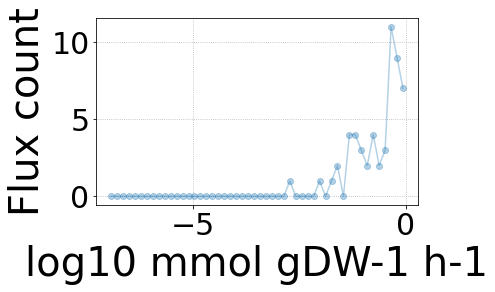

In [54]:
original_values = list(numpy.abs(batch_1_rate.values.flatten()))
print(numpy.min(original_values), numpy.max(original_values))
print(numpy.min(numpy.min(batch_1_rate)))

transformed_values = []
for element in original_values:
    if element == 0:
        transformed = 0
    else:
        transformed = numpy.log10(element)
    transformed_values.append(transformed)

print(len(transformed_values))
print(numpy.min(transformed_values), numpy.max(transformed_values))

number_of_bins = 50
found_min = -7
found_max = 0

hist, bin_edges = numpy.histogram(transformed_values, bins=number_of_bins, range=(found_min, found_max))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]

plotting_x = x
plotting_y = hist

matplotlib.pyplot.plot(plotting_x, plotting_y, 'o-', alpha=1/3)

matplotlib.pyplot.xlabel('log10 mmol gDW-1 h-1')
matplotlib.pyplot.ylabel('Flux count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.tight_layout()

# Pending to check above

In [10]:
#rates.to_csv('rates.csv')

### References for uptake rates

https://www.nature.com/articles/srep41241

In [55]:
rates['Glucose']

TypeError: string indices must be integers

In [11]:
rates['Glucose  -  POS']

154 Lami 20D 33         -0.906406
153 Lami 20D - 19       -0.098675
46 Lami 20D - 4         -0.304599
154 Stat - 29           -0.695100
153 Stat 2.0 - 17       -0.219046
46 Stat (Imputed)       -0.395400
154 Osci 20D 3.0 - 68    0.062359
153 Osci 20D - 21       -0.046715
46 Osci 20D - 6         -0.172754
Name: Glucose  -  POS, dtype: float64

In [305]:
rates['Glutamine']

Treatment
0.0    458.230269
0.5    566.564011
5.0    310.972516
Name: Glutamine, dtype: float64

### visualize

In [306]:
rates

,Glutamine,"N,N_Dimethylglycine",Tryptophan,ADMA,Arginine,Carnitine,Citrulline,Cysteine,Cystine,Glucose,...,Taurine,Asparagine,Xanthosine,Ascorbic Acid,Serine,Panthotenic Acid,Pyruvate,Orotate,Lactate,Thymidine
Treatment,,,,,,,,,,,,,,,,,,,,,
0.0,458.230269,39.451773,5.608099,0.580254,99.405807,0.060050,2.585326,52.955271,16.200815,1649.950170,...,0.090772,4.057805,0.183614,0.841549,9.606956,199.856551,84.630391,2.060810,6480.020357,36.648083
0.5,566.564011,47.036374,6.990353,0.736594,170.369943,0.065478,3.056538,61.816436,21.340722,1781.236710,...,0.077832,7.685866,1.420987,0.933837,15.367233,292.779957,108.640270,8.843332,14160.042837,2963.331892
5.0,310.972516,130.346616,4.904349,0.249438,98.407068,0.043421,2.025151,43.553879,14.348260,1247.230264,...,0.122165,27.618217,0.498733,0.304800,294.144653,175.123701,52.040372,5.423191,27674.922466,439.320135


In [309]:
rates.index

Float64Index([0.0, 0.5, 5.0], dtype='float64', name='Treatment')

In [315]:
my_colors = []
my_markers= []
for element in rates.index:
    if element == 0.0:
        label = 'Low Dose'
        color = 'skyblue'
        the_marker = 'o'
    elif element == 0.5:
        label = 'Medium Dose'
        color = 'lightgreen'
        the_marker = 's'
    elif element == 5.0:
        label = 'High Dose'
        color = 'salmon'
        the_marker = '*'
    my_colors.append(color)
    my_markers.append(the_marker)
print(my_colors)
print(my_markers)

['skyblue', 'lightgreen', 'salmon']
['o', 's', '*']


In [15]:
my_markers = []
for element in rates.index:
    if '154' in element:
        the_marker = 'o'
    if '153' in element:
        the_marker = 's'
    if '46' in element:
        if 'Imputed' in element:
            the_marker = '*'
        else:
            the_marker = 'd'
    my_markers.append(the_marker)
print(my_markers)

['o', 's', 'd', 'o', 's', '*', 'o', 's', 'd']


In [16]:
rates.shape

(9, 56)

In [316]:
metabolite_labels = []
plotting_container = {}; plotting_averages = {}

for metabolite in rates.columns:

    #
    # deal with metabolite label
    #
    if 'POS' in metabolite:
        term = 'P'
    else:
        if 'BASIC NEG' in metabolite:
            term = 'B'
        elif 'NEG' in metabolite:
            term = 'N'
        else:
            raise ValueError('mode not recognized')
    metabolite_label = metabolite.split('  -  ')[0] + '.' + term
    if metabolite_label == 'Asymmetric dimethylarginine.P':
        metabolite_label = 'Dimethylarginine.P'
    metabolite_labels.append(metabolite_label)
    print(metabolite_label)

    #
    # deal with positions
    #
    position = list(rates.columns).index(metabolite)
    observed_values = rates[metabolite].values
    positions = [position for i in range(len(observed_values))]

    #
    # transformations
    #
    transformed_values = []
    for element in observed_values:
        new = None
        if element == 0:
            final = 0
        else:
            if element > 0:
                new = -numpy.log10(element)
                if new > 3:
                    new = 3
                # axis orientation correction
                final = 3 - new + 0.2

            if element < 0:
                new = numpy.log10(numpy.abs(element))
                if new < -3:
                    new = -3
                # axis orientation correction
                final = -3 - new - 0.2

        transformed_values.append(final)
        print(element, new, final)
    #    
    # store values for sorted plot
    #
    plotting_container[metabolite_label] = transformed_values
    plotting_averages[metabolite_label] = numpy.median(transformed_values) # median or mean?
    print()

    #
    # plot
    #
    for i in range(len(positions)):
        matplotlib.pyplot.plot(positions[i], transformed_values[i], 
        color=my_colors[i], alpha=1/2, marker=my_markers[i], ms=15, mew=0)

#
# aesthetics to close plot
#
matplotlib.pyplot.xticks(range(len(metabolite_labels)), metabolite_labels, fontsize=12, rotation=-30)
matplotlib.pyplot.yticks(
    [-3.2, -2.2, -1.2, -0.2, 0.2, 1.2, 2.2, 3.2], 
    ['-1', '-0.1', '-0.01', '-0.001', '0.001', '0.01', '0.1', '1'], fontsize=20
    )
matplotlib.pyplot.ylim([-3.3, 3.3])
matplotlib.pyplot.ylabel('Flux [mmol gDW h]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

ValueError: mode not recognized

### sorting

In [18]:
sorted_metabolites = list(dict(sorted(plotting_averages.items(), key=lambda item: item[1])).keys())
sorted_metabolites

['Glucose.P',
 'Valine.N',
 'Oxoproline.B',
 'Cystine.P',
 'Asparagine.B',
 'Malate.N',
 'Panthotenic Acid.N',
 'Tyrosine.N',
 'Asparagine.N',
 'Mannitol.P',
 'Nicotinamide.P',
 'Cysteine.P',
 'Pyridoxine.B',
 'Adenine.P',
 'Adenosine.P',
 'Carnitine.P',
 'Guanine.P',
 'Hypoxanthine.P',
 'Serotonin.P',
 'S-Adenosyl methionine.P',
 '4-Hydroxyproline.P',
 'Aspartate.N',
 'Gluconate.N',
 'Xanthine.N',
 'Uric acid.N',
 'Tryptophan.P',
 'Dimethylarginine.P',
 'Phenylalanine.P',
 'Thiamine.P',
 'Choline.P',
 'Creatine.P',
 'Hydroxyproline.P',
 'Methionine.P',
 'Acetyltaurine.N',
 'Xanthosine.N',
 'Folic acid.B',
 'Inosine.B',
 'Ornithine.N',
 'Asparagine.P',
 'Taurine.N',
 'Histidine.P',
 'Proline.P',
 'Arginine.P',
 'Alanine.B',
 'Pyruvate.B',
 'Phosphocholine.P',
 'Lysine.P',
 'Citrate.N',
 'Uridine.N',
 'Threonine.B',
 'Glutamate.N',
 'Glutamine .P',
 'Serine.B',
 'Succinic acid.B',
 'Lactic acid first peak.B',
 '(Iso)leucine.P']

### sorted plot

In [19]:
len(sorted_metabolites)

56

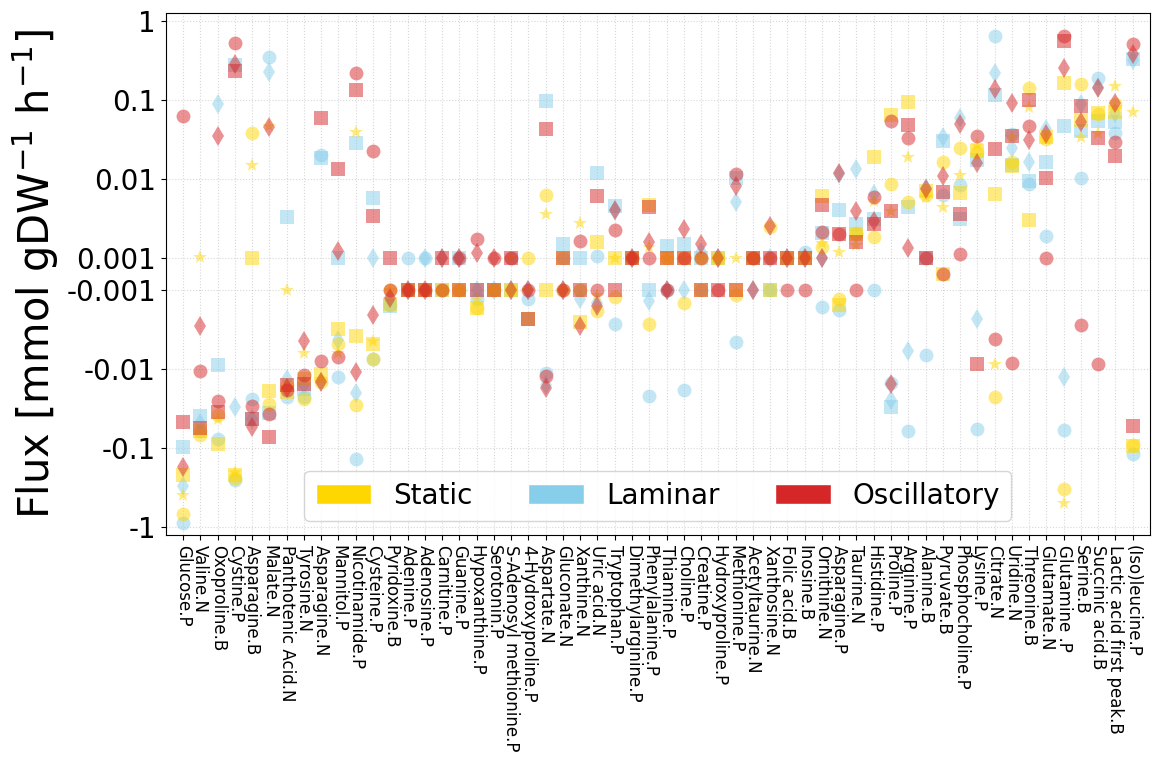

In [20]:
for metabolite_label in sorted_metabolites:

    plotting_values = plotting_container[metabolite_label]

    position = sorted_metabolites.index(metabolite_label)
    positions = [position for i in range(len(plotting_values))]

    for i in range(len(positions)):
        matplotlib.pyplot.plot(positions[i], plotting_values[i], 
        color=my_colors[i], alpha=1/2, marker=my_markers[i], ms=10, mew=0)

#
# legend
#
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white')
]
matplotlib.pyplot.legend(legend_elements, ['Static', 'Laminar', 'Oscillatory'], ncol=3)

#
# aesthetics to close plot
#
matplotlib.pyplot.xticks(range(len(sorted_metabolites)), sorted_metabolites, fontsize=12, rotation=-90)
matplotlib.pyplot.yticks(
    [-3.2, -2.2, -1.2, -0.2, 0.2, 1.2, 2.2, 3.2], 
    ['-1', '-0.1', '-0.01', '-0.001', '0.001', '0.01', '0.1', '1'], fontsize=20
    )
matplotlib.pyplot.ylim([-3.3, 3.3])
matplotlib.pyplot.xlim([-1, 56])
matplotlib.pyplot.ylabel('Flux [mmol gDW$^{-1}$ h$^{-1}$]', fontsize=30)
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

### plot median across patients

In [21]:
simpler_container = {}; simplest_container = {}; sd_container = {}
for metabolite_label in plotting_container:
    simpler_container[metabolite_label] = []; sd_container[metabolite_label] = []
    
    simpler_container[metabolite_label].append(numpy.median(plotting_container[metabolite_label][:3]))
    simpler_container[metabolite_label].append(numpy.median(plotting_container[metabolite_label][3:6]))
    simpler_container[metabolite_label].append(numpy.median(plotting_container[metabolite_label][6:]))

    simplest_container[metabolite_label] = numpy.median(simpler_container[metabolite_label])

    sd_container[metabolite_label].append(numpy.std(plotting_container[metabolite_label][:3]))
    sd_container[metabolite_label].append(numpy.std(plotting_container[metabolite_label][3:6]))
    sd_container[metabolite_label].append(numpy.std(plotting_container[metabolite_label][6:]))

In [22]:
simplest_container

{'Glutamine .P': -1.3104366956385607,
 'Tryptophan.P': 0.5480685707272601,
 'Adenine.P': -0.2,
 'Adenosine.P': -0.2,
 'Dimethylarginine.P': 0.2,
 'Arginine.P': 1.4702397243411156,
 'Carnitine.P': -0.2,
 'Cysteine.P': 0.2,
 'Cystine.P': -1.6787170042885315,
 'Glucose.P': -2.6837287596955695,
 'Guanine.P': 0.2,
 'Histidine.P': 0.6954329175843166,
 'Hypoxanthine.P': -0.2,
 'Lysine.P': 1.4038404073582988,
 'Mannitol.P': -0.8384596017924777,
 'Nicotinamide.P': -0.7876464709779032,
 'Phenylalanine.P': 0.33673092331781734,
 'Phosphocholine.P': 1.1228218680169049,
 'Proline.P': 0.7971624835717865,
 'Serotonin.P': -0.2,
 'S-Adenosyl methionine.P': -0.2,
 'Thiamine.P': -0.2,
 'Choline.P': 0.2,
 '(Iso)leucine.P': 2.703990977129469,
 'Asparagine.P': 0.4968799615451552,
 'Creatine.P': 0.2,
 'Hydroxyproline.P': 0.2,
 'Methionine.P': 0.9025058431820525,
 '4-Hydroxyproline.P': -0.2,
 'Aspartate.N': -1.2609169129814435,
 'Tyrosine.N': -1.3294584491283374,
 'Gluconate.N': -0.2,
 'Xanthine.N': -0.2,
 'Ur

In [23]:
sorted_metabolites = list(dict(sorted(simplest_container.items(), key=lambda item: item[1])).keys())

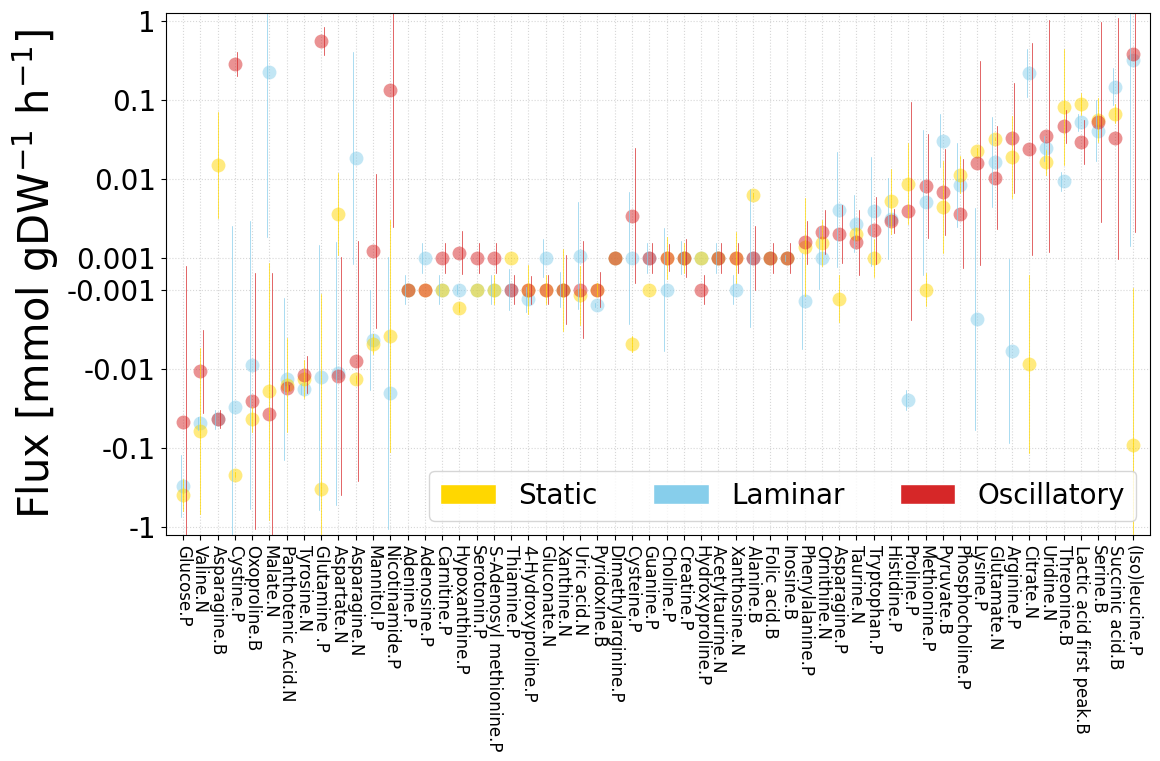

In [24]:
my_colors = ['skyblue','gold', 'tab:red']
for metabolite_label in sorted_metabolites:

    plotting_values = simpler_container[metabolite_label]

    position = sorted_metabolites.index(metabolite_label)
    positions = [position for i in range(len(plotting_values))]

    for i in range(len(positions)):
        shift = 0
        matplotlib.pyplot.plot(positions[i]+shift, plotting_values[i], 
        color=my_colors[i], alpha=1/2, marker='o', ms=10, mew=0)

    for i in range(len(positions)):
        shift = -0.15 + i*0.15
        x = [positions[i]+shift, positions[i]+shift]
        y = [plotting_values[i] - sd_container[metabolite_label][i], plotting_values[i] + sd_container[metabolite_label][i]]
        matplotlib.pyplot.plot(x, y, '-', color=my_colors[i], lw=0.5)

#
# legend
#
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white')
]
matplotlib.pyplot.legend(legend_elements, ['Static', 'Laminar', 'Oscillatory'], ncol=3)

#
# aesthetics to close plot
#
matplotlib.pyplot.xticks(range(len(sorted_metabolites)), sorted_metabolites, fontsize=12, rotation=-90)
matplotlib.pyplot.yticks(
    [-3.2, -2.2, -1.2, -0.2, 0.2, 1.2, 2.2, 3.2], 
    ['-1', '-0.1', '-0.01', '-0.001', '0.001', '0.01', '0.1', '1'], fontsize=20
    )
matplotlib.pyplot.ylim([-3.3, 3.3])
matplotlib.pyplot.xlim([-1, 56])
matplotlib.pyplot.ylabel('Flux [mmol gDW$^{-1}$ h$^{-1}$]', fontsize=30)
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

### separated panels

In [25]:
uptaken = sorted_metabolites[:14]
middle = sorted_metabolites[14:33]
secreted = sorted_metabolites[33:]

print(uptaken)
print(middle)
print(secreted)

['Glucose.P', 'Valine.N', 'Asparagine.B', 'Cystine.P', 'Oxoproline.B', 'Malate.N', 'Panthotenic Acid.N', 'Tyrosine.N', 'Glutamine .P', 'Aspartate.N', 'Asparagine.N', 'Mannitol.P', 'Nicotinamide.P', 'Adenine.P']
['Adenosine.P', 'Carnitine.P', 'Hypoxanthine.P', 'Serotonin.P', 'S-Adenosyl methionine.P', 'Thiamine.P', '4-Hydroxyproline.P', 'Gluconate.N', 'Xanthine.N', 'Uric acid.N', 'Pyridoxine.B', 'Dimethylarginine.P', 'Cysteine.P', 'Guanine.P', 'Choline.P', 'Creatine.P', 'Hydroxyproline.P', 'Acetyltaurine.N', 'Xanthosine.N']
['Alanine.B', 'Folic acid.B', 'Inosine.B', 'Phenylalanine.P', 'Ornithine.N', 'Asparagine.P', 'Taurine.N', 'Tryptophan.P', 'Histidine.P', 'Proline.P', 'Methionine.P', 'Pyruvate.B', 'Phosphocholine.P', 'Lysine.P', 'Glutamate.N', 'Arginine.P', 'Citrate.N', 'Uridine.N', 'Threonine.B', 'Lactic acid first peak.B', 'Serine.B', 'Succinic acid.B', '(Iso)leucine.P']


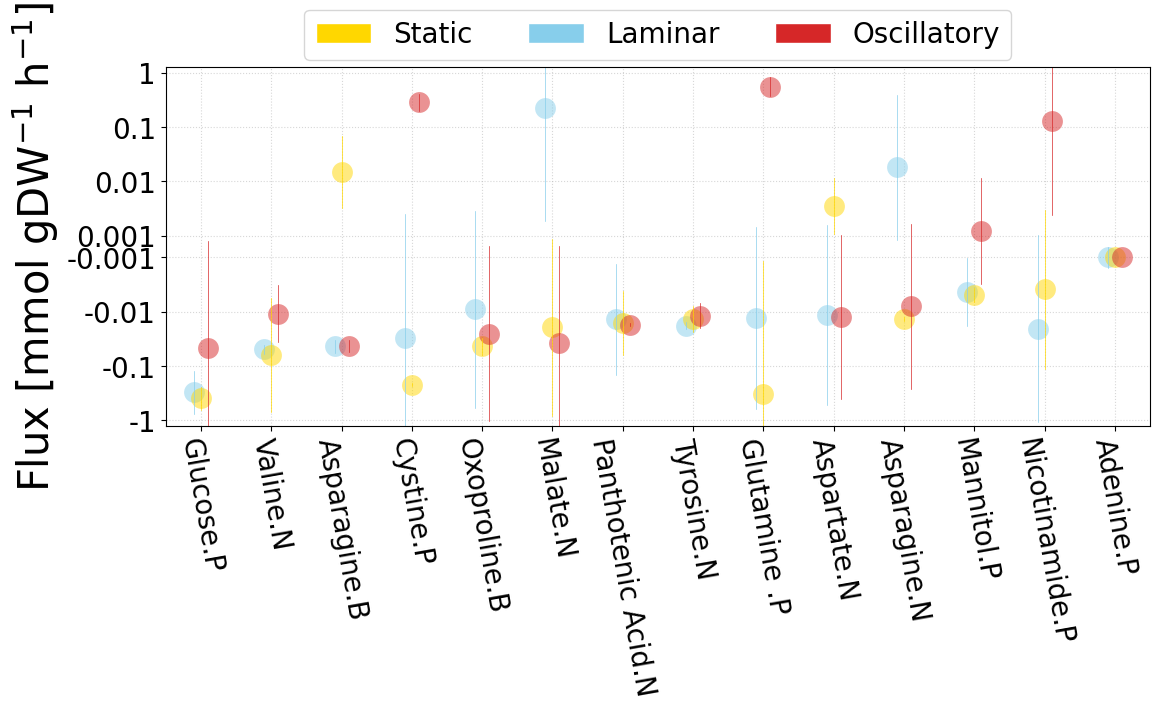

In [26]:
my_colors = ['skyblue','gold', 'tab:red']
for metabolite_label in uptaken:

    plotting_values = simpler_container[metabolite_label]

    position = uptaken.index(metabolite_label)
    positions = [position for i in range(len(plotting_values))]

    for i in range(len(positions)):
        shift = -0.1 + i*0.1
        matplotlib.pyplot.plot(positions[i]+shift, plotting_values[i], 
        color=my_colors[i], alpha=1/2, marker='o', ms=15, mew=0)

    for i in range(len(positions)):
        shift = -0.1 + i*0.1
        x = [positions[i]+shift, positions[i]+shift]
        y = [plotting_values[i] - sd_container[metabolite_label][i], plotting_values[i] + sd_container[metabolite_label][i]]
        matplotlib.pyplot.plot(x, y, '-', color=my_colors[i], lw=0.5)

#
# legend
#
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white')
]
matplotlib.pyplot.legend(
    legend_elements, ['Static', 'Laminar', 'Oscillatory'], 
    ncol=3, 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2))

#
# aesthetics to close plot
#
matplotlib.pyplot.xticks(range(len(uptaken)), uptaken, fontsize=20, rotation=-80)
matplotlib.pyplot.yticks(
    [-3.2, -2.2, -1.2, -0.2, 0.2, 1.2, 2.2, 3.2], 
    ['-1', '-0.1', '-0.01', '-0.001', '0.001', '0.01', '0.1', '1'], fontsize=20
    )
matplotlib.pyplot.ylim([-3.3, 3.3])
matplotlib.pyplot.xlim([-0.5, len(uptaken)-0.5])
matplotlib.pyplot.ylabel('Flux [mmol gDW$^{-1}$ h$^{-1}$]', fontsize=30)
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

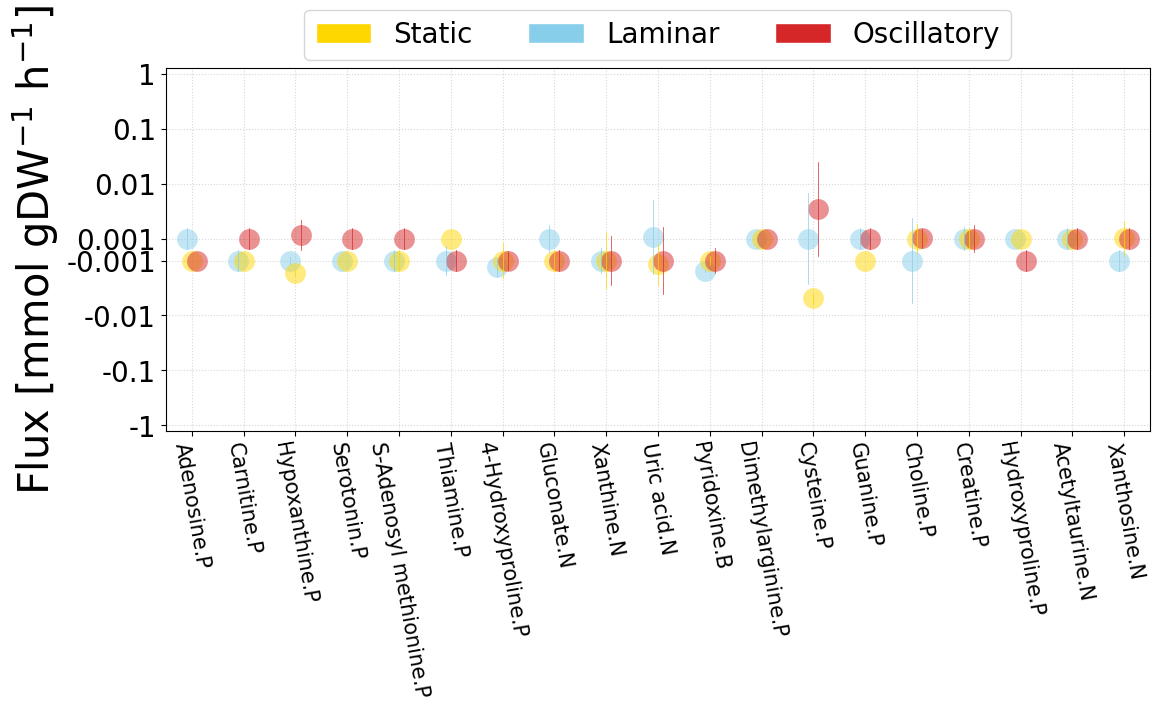

In [27]:
my_colors = ['skyblue','gold', 'tab:red']
for metabolite_label in middle:

    plotting_values = simpler_container[metabolite_label]

    position = middle.index(metabolite_label)
    positions = [position for i in range(len(plotting_values))]

    for i in range(len(positions)):
        shift = -0.1 + i*0.1
        matplotlib.pyplot.plot(positions[i]+shift, plotting_values[i], 
        color=my_colors[i], alpha=1/2, marker='o', ms=15, mew=0)

    for i in range(len(positions)):
        shift = -0.1 + i*0.1
        x = [positions[i]+shift, positions[i]+shift]
        y = [plotting_values[i] - sd_container[metabolite_label][i], plotting_values[i] + sd_container[metabolite_label][i]]
        matplotlib.pyplot.plot(x, y, '-', color=my_colors[i], lw=0.5)

#
# legend
#
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white')
]
matplotlib.pyplot.legend(
    legend_elements, ['Static', 'Laminar', 'Oscillatory'], 
    ncol=3, 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2))

#
# aesthetics to close plot
#
matplotlib.pyplot.xticks(range(len(middle)), middle, fontsize=15, rotation=-80)
matplotlib.pyplot.yticks(
    [-3.2, -2.2, -1.2, -0.2, 0.2, 1.2, 2.2, 3.2], 
    ['-1', '-0.1', '-0.01', '-0.001', '0.001', '0.01', '0.1', '1'], fontsize=20
    )
matplotlib.pyplot.ylim([-3.3, 3.3])
matplotlib.pyplot.xlim([-0.5, len(middle)-0.5])
matplotlib.pyplot.ylabel('Flux [mmol gDW$^{-1}$ h$^{-1}$]', fontsize=30)
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

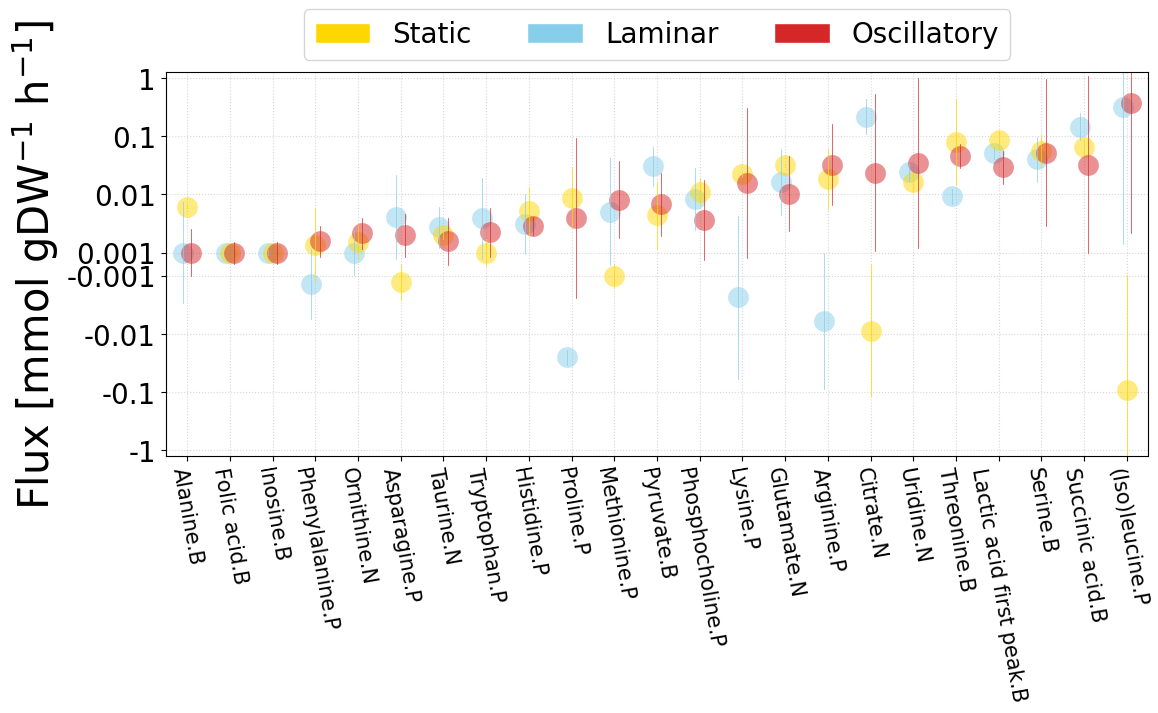

In [28]:
my_colors = ['skyblue','gold', 'tab:red']
for metabolite_label in secreted:

    plotting_values = simpler_container[metabolite_label]

    position = secreted.index(metabolite_label)
    positions = [position for i in range(len(plotting_values))]

    for i in range(len(positions)):
        shift = -0.1 + i*0.1
        matplotlib.pyplot.plot(positions[i]+shift, plotting_values[i], 
        color=my_colors[i], alpha=1/2, marker='o', ms=15, mew=0)

    for i in range(len(positions)):
        shift = -0.1 + i*0.1
        x = [positions[i]+shift, positions[i]+shift]
        y = [plotting_values[i] - sd_container[metabolite_label][i], plotting_values[i] + sd_container[metabolite_label][i]]
        matplotlib.pyplot.plot(x, y, '-', color=my_colors[i], lw=0.5)

#
# legend
#
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white')
]
matplotlib.pyplot.legend(
    legend_elements, ['Static', 'Laminar', 'Oscillatory'], 
    ncol=3, 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2))

#
# aesthetics to close plot
#
matplotlib.pyplot.xticks(range(len(secreted)), secreted, fontsize=15, rotation=-80)
matplotlib.pyplot.yticks(
    [-3.2, -2.2, -1.2, -0.2, 0.2, 1.2, 2.2, 3.2], 
    ['-1', '-0.1', '-0.01', '-0.001', '0.001', '0.01', '0.1', '1'], fontsize=20
    )
matplotlib.pyplot.ylim([-3.3, 3.3])
matplotlib.pyplot.xlim([-0.5, len(secreted)-0.5])
matplotlib.pyplot.ylabel('Flux [mmol gDW$^{-1}$ h$^{-1}$]', fontsize=30)
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7660b09-2910-4997-aa15-808385c473a6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>